# Projet numérique 2 #

## Question 1 ##

- $\dot x_1$ modélise la croissance du nombre de proies
- $\dot x_2$ modélise la croissance du nombre de prédateurs
- $\alpha$ est le facteur de reproduction des proies
- $\beta$ est le facteur modélisant la présence de prédateurs sur l'évolution de la population de proies
- $\gamma$ est le facteur de disparition des prédateurs sans proies
- $\delta$ est le facteur modélisant la présence de proies sur l'évolution de la population prédateurs

Le système est $\dot x = f(x)$ avec $f(x_1,x_2)=(x_1(\alpha -\beta x_2), -x_2(\gamma - \delta x_1))$
On remarque deux points qui annulent f : (0,0) et $(\gamma / \delta , \alpha / \beta)$
Les deux points appartiennent bien à $\mathbb{R+*}$. Ce sont les points d'équilibre cherchés.

Calculons la matrice jacobienne de f.  
$J_f((0,0)) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \end{pmatrix}$  
Il y a une valeur propre à partie réelle négative ($-\alpha$) donc par lien entre stabilité et stabilité du linéarisé tangent, (0,0) est instable.

$J_f(\overline x) = \begin{pmatrix} 0 & -\alpha \\ \gamma & 0 \end{pmatrix}$  
Les deux valeurs propres ont une partie réelle nulle, on ne peut rien savoir à ce stade sur la stabilité de $\overline x$.

# Question 2 #

## Question 4 ##

Soit x1 et x2 des réels positifs.  

$\partial H / \partial x_1 = \dot x_2 / x_2 x_1$  
$\partial H / \partial x_2 = - \dot x_1 / x_2 x_1$


## Question 5 ##

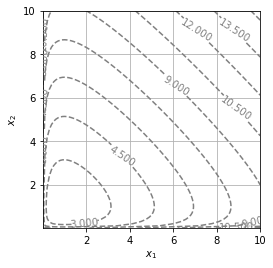

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def H(x1, x2):
    return (x1 - np.log(x1) + x2 - np.log(x2))

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = H(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
display_contour(f, x=np.linspace(0.01, 10, 100), y=np.linspace(0.01, 10, 100), levels=10)

## Question 6 ##

In [3]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.arange(t0, tf, dt)
    x = [x0]
    for k in t[:-1]:
        x.append(x[-1][0]+dt*f(k, x[-1])[0], x[-1][1]+dt*f(k, x[-1])[1])
    return t, x

solve_euler_explicit(lambda t, x: x, 1, 0.1, 0, 1)
# Il s'agit bien de l'exponentielle entre 0 et 1.

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [1,
  1.1,
  1.2100000000000002,
  1.3310000000000002,
  1.4641000000000002,
  1.61051,
  1.7715610000000002,
  1.9487171,
  2.1435888100000002,
  2.357947691])

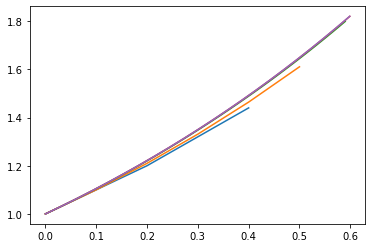

In [4]:
for k in [0.2, 0.1, 0.01, 0.001]:
    plt.plot(solve_euler_explicit(lambda t, x: x, 1, k, 0, 0.6)[0], solve_euler_explicit(lambda t, x: x, 1, k, 0, 0.6)[1])
    #legend
    
t = np.arange(0, 0.6, 0.001)
y = np.exp(t)
plt.plot(t,y)
plt.show()

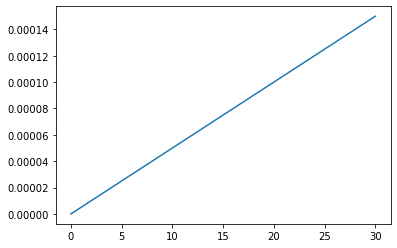

In [9]:
dt = 0.00001

t = np.arange(0, 30, dt)
difference = (np.exp(t) - solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1])/np.exp(t)


plt.plot(t,difference)
plt.show()

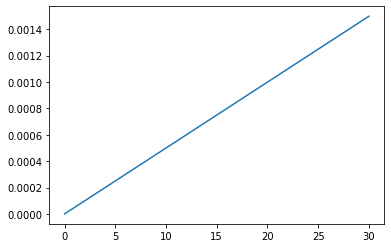

In [29]:
#Ordre 1

dt = 0.0001

t = np.arange(0, 30, dt)
der_approx = np.subtract(solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1][1:],solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1][:-1])/dt
difference = (np.exp(t)[:-1] - der_approx)/np.exp(t)[:-1]

plt.plot(t[:-1],difference)
plt.show()

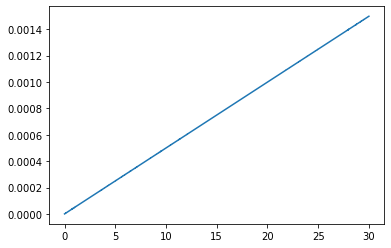

In [30]:
#Ordre 2

dt = 0.0001

t = np.arange(0, 30, dt)
der_approx = np.subtract(solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1][1:],solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1][:-1])/dt
der2_approx = np.subtract(der_approx[1:],der_approx[:-1])/dt
difference = (np.exp(t)[:-2] - der2_approx)/np.exp(t)[:-2]

plt.plot(t[:-2],difference)
plt.show()

## Question 7 ##

In [31]:
def f(x1, x2, alpha=1, beta=1, gamma=1, delta=1):
    return (x1*(alpha-beta*x2), -x2(gamma - delta*x1))

solve_euler_explicit(f, (2,3), 0.001, 0, 30)


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'